# Exploring Data Limitations
 - In this project, we use the Case Fatality Rate
 - We wanted to look at the relationships using the Crude Mortality Rate
 - In an ideal world, we would use the Infection Fatality Rate

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from census import Census
from us import states
from functions import regressionLine, scatterDraw, stateGrouper, boxDraw, runAnova

## Load Master Data

In [2]:
master_df = pd.read_csv('resources/MasterData200730.csv')

In [3]:
master_df.head()

,State,Abv,Date,Tested,Positive,Deaths,Mortality Rate,Happiness Rank,totalScore,Emotional/Physical Rank,Work Enviroment Rank,Community Enviroment Rank,Happiness Rank Inv,Emotional/Physical Rank Inv,Work Enviroment Rank Inv,Community Enviroment Rank Inv,State Population
0,Alaska,AK,2020-07-25 07:10:21,200572.0,1693.0,19.0,1.122268,47.0,38.21,33.0,49.0,50.0,3.0,17.0,1.0,0.0,738516.0
1,Alabama,AL,2020-07-25 07:10:21,627344.0,74365.0,1395.0,1.875882,45.0,39.35,46.0,39.0,43.0,5.0,4.0,11.0,7.0,4864680.0
2,Arkansas,AR,2020-07-22 05:16:54,439635.0,34655.0,374.0,1.079209,49.0,36.61,50.0,29.0,23.0,1.0,0.0,21.0,27.0,2990671.0
3,Arizona,AZ,2020-07-25 07:23:41,1053832.0,156301.0,3142.0,2.010224,21.0,52.92,27.0,12.0,34.0,29.0,23.0,38.0,16.0,6946685.0
4,California,CA,2020-07-25 07:23:41,6915876.0,435334.0,8186.0,1.880395,5.0,63.14,4.0,24.0,12.0,45.0,46.0,26.0,38.0,39148760.0


## Define Functions

In [18]:
def plotMortality(x, y, color, title, xlabel, ylabel):
    
    plt.figure(figsize=(16, 10))
    
    plt.scatter(x, y, c=color)
    
    plt.xticks(ticks=master_df["Happiness Rank Inv"], labels=master_df["State"], rotation=45)
    
    # Utilize the regressionLine function defined in functions.py
    regressionLine(x, y, 1, 1)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    plt.show()

## Scatter Plot Before

R-squared: 0.004017


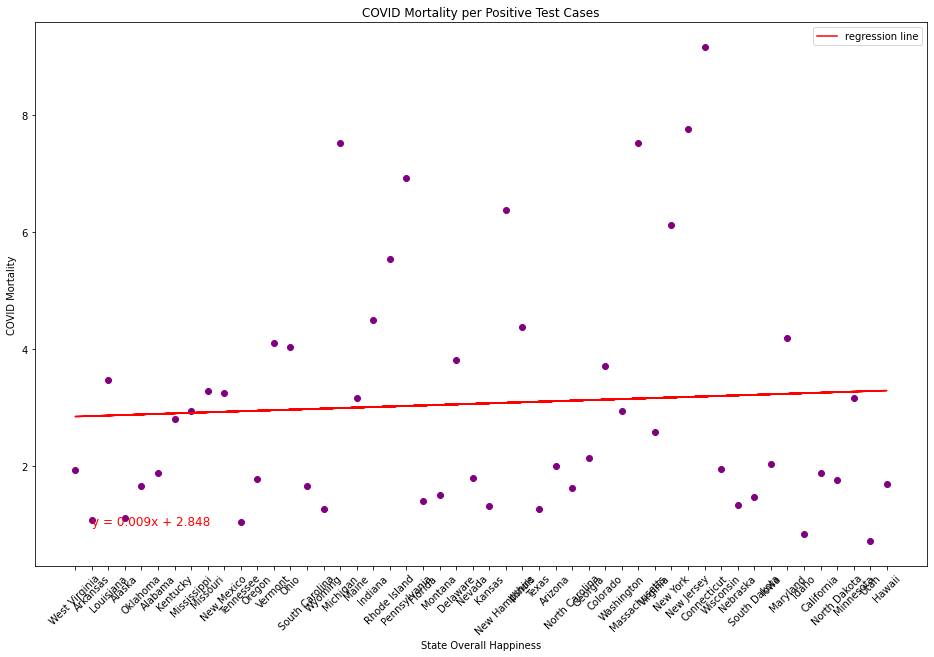

In [19]:
# Scatter Plot
plotMortality(master_df["Happiness Rank Inv"], 
              master_df["Mortality Rate"], 
              "purple", 
              "COVID Mortality per Positive Test Cases",
              "State Overall Happiness",
              "COVID Mortality")


# Grab State Population Data
 - Use the census Python package to fetch the population data for each state

In [ ]:
master_df = master_df.set_index('State')
master_df['State Population'] = ''

In [ ]:
# Utilize census package
c = Census("661e1f2142e1cf49fc3ccb14fbef9446886ea826")
state_pop_data = c.acs5.get(('NAME', 'B01003_001E'), {'for': 'state:*'})
print(state_pop_data)

for item in state_pop_data:
    pop = item['B01003_001E']
    name = item['NAME']
    master_df.loc[name, "State Population"] = pop

master_df.head(10)

In [ ]:
master_df.to_csv('Resources/MasterData200730.csv')

## Calculate COVID Deaths Per Total Population

In [11]:
deaths_per_pop = master_df["Deaths"] / master_df["State Population"].astype('float64') * 1000
deaths_per_pop = deaths_per_pop.dropna()
master_df = master_df.dropna()

R-squared: 0.022397


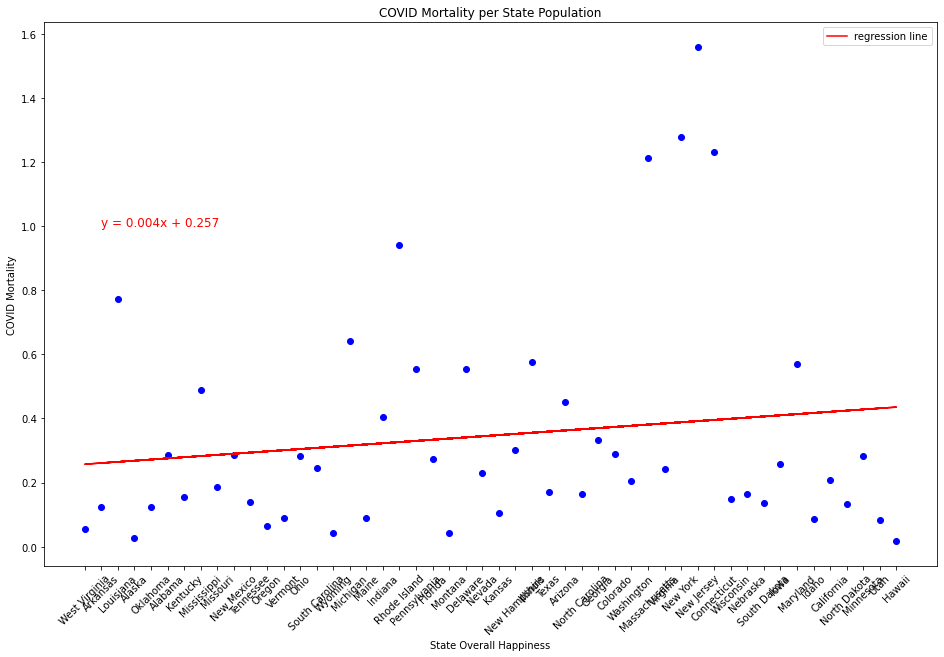

In [20]:
plotMortality(master_df["Happiness Rank Inv"], 
              deaths_per_pop, 
              "blue", 
              "COVID Mortality per State Population",
              "State Overall Happiness",
              "COVID Mortality")


# Conclusions

In [ ]:
# We concluded that there was not a significant enough improvement in the relationships to warrant a rewrite of our
## analyses 